<a href="https://colab.research.google.com/github/sundarjhu/UACJ_Jornada2021/blob/main/Espectro_UACJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis del espectro óptico de KISSR 298

## Bajar el espectro de la base de datos del Sloan Digital Sky Survey (SDSS)

INSTRUCCIÓN. Nuestra galaxia se llama KISSR 298. Necesitamos las coordenadas (RA, Dec) o (longitude, latitude) del objeto en el sistema de referencia Equatorial (J2000.0). Encuentra las coordenadas buscando por al objeto por su nombre aquí:
https://ned.ipac.caltech.edu/.
Verifica que las coordenadas del objecto dadas abajo están correctas y de no ser así, modifícalas con los valores que encontraste.

In [1]:
RA=202.457480 #longitude in Equatorial J2000
Dec=29.579716 #latitude in Equatorial J2000

INSTRUCCIÓN. Para bajar el espectro de la base de datos, necesitamos los IDs de la placa, la fecha y la fibra con que se usaron para obtener los datos. Busca el objecto usando las coordenadas en: https://skyserver.sdss.org/dr14/en/tools/chart/chartinfo.aspx. Dále a "Get Image" para ver la imagen del objeto. Puedes cambiar el tamaño de la imagen con los botones de "+" y "-".

INSTRUCCIÓN. Haz click en "Explore" para ir a donde se encuentra el espectro. Abajo a la derecha, en donde dice "Interactive Spectrum", hay una tabla con información sobre las observaciones del objeto. Verifica que la siguiente información es correcta y de no ser así, modifícala.

In [2]:
plate=1978
mjd=53473 #Modified Julian Date
fiberid=371

In [3]:
canonical = 'https://dr14.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid='+str(plate)+'&mjd='+str(mjd)+'&fiberid='+str(fiberid)

Importamos los paquetes necesarios.

In [4]:
from astropy.io import fits

from astropy import units as u

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

from astropy.visualization import quantity_support

quantity_support()  # for getting units on the axes below

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f4b30125a10>

Los espectros están en archivos formato fits.

Cargamos los datos y contruimos los vectores de longitudes de onda (wave) , de flujos (flux), y de errores en los flujos (err).

In [5]:
f = fits.open(canonical) 

#El espectro está en el segundo encabezado del archivo (f[1])
specdata = f[1].data 
f.close()

wave = 10**specdata['loglam'] * u.AA # longitud de onda
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') # flujo
ivar = specdata['ivar']# inverso de la varianza
err = 1 / np.sqrt(ivar) # error * u.Unit('erg cm-2 s-1 AA-1') # error en el flujo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Instalamos el paquete specutils.

In [9]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install specutils

     |████████████████████████████████| 645kB 4.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 174kB 40.0MB/s 
     |████████████████████████████████| 512kB 37.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61kB 6.1MB/s 
  Created wheel for specutils: filename=specutils-1.2-cp37-none-any.whl size=177575 sha256=8d742d17679e604bb71f8dfd92fd0340e064641ac0c8f5b0622465147b0f72e8
  Stored in directory: /root/.cache/pip/wheels/af/88/32/7ccdd3bfdd9469747850b14674938ccc180caf58f69e006659
  Created wheel for asdf: filename=asdf-2.7.3-cp37-none-any.whl size=573206 sha256=ad2844e8868b7d1adc90378e686093c363905fc9cb5971e8bfd71cc1162f0404
  Stored in directory: /root/.cache/pip/wheels/01/cc/ff/c29ad7c212112bbdd9f416c24915607bdf2b4d83641f876e2e
Successfu

Vamos a poner los datos en el formato apropiado para "astropy" y crear un objeto llamado "Spectrum1D" que vamos a graficar.

In [10]:
from specutils import Spectrum1D

spec = Spectrum1D(spectral_axis=wave, flux=flux)

ContextualVersionConflict: ignored

Graficamos el espectro.

Text(0, 0.5, 'Flux (cm/s/cm2/A)')

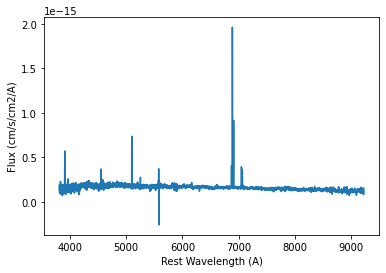

In [11]:
f, ax = plt.subplots()  

#ax.step(spec.spectral_axis, spec.flux)
#plt.xlabel('Rest Wavelength ({})'.format(spec.spectral_axis.unit)) 
#plt.ylabel('Flux ({})'.format(spec.flux.unit))
ax.plot(wave, flux)
plt.xlabel('Rest Wavelength (A)') 
plt.ylabel('Flux (cm/s/cm2/A)')

# Corrección por polvo en la Vía Láctea

INSTRUCCIÓN. Vamos a corregir la luz de las estrellas que se encuentran en la galaxia KISSR 298 por extinción debida al polvo en nuestra Galaxia.

Para esto, necesitamos el exceso de color debido al polvo en nuestra Galaxia, en la dirección de KISSR 298. 

Para calcular el exceso de color, E(B-V), primero encuentra la extinción Galáctica en las bandas Landolt B y V, yendo a la liga de abajo, introduciendo el nombre del objeto, luego yendo a la pestaña de Galactic Extinction, y finalmente yendo a la columna "Galactic Extinctions".
https://ned.ipac.caltech.edu/


In [12]:
B=0.062 # extinción Galáctica en la banda B
V=0.047 # extinción Galáctica en la banda V
ebvmw=B-V # exceso de color E(B-V) de la Vía Láctea (Milky Way)

Importamos un paquete necesario.

In [14]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install dust_extinction.parameter_averages

ERROR: Could not find a version that satisfies the requirement dust_extinction.parameter_averages (from versions: none)
ERROR: No matching distribution found for dust_extinction.parameter_averages


In [13]:
# Import this model: Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
from dust_extinction.parameter_averages import CCM89
from scipy.optimize import curve_fit

# Define the reddening model

ext = CCM89(Rv=3.1)

# Flujo corregido (unextinguished flux )

uflux = flux / ext.extinguish(1/wave.to(u.micron), Ebv=0.1)


ModuleNotFoundError: ignored

Graficamos el espectro antes y después de la corrección por enrojecimiento en la Vía Láctea.

(0.0, 5e-16)

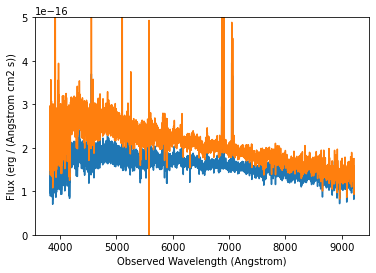

In [ ]:
f, ax = plt.subplots()  

ax.step(spec.spectral_axis, spec.flux)
ax.plot(wave,uflux)
plt.xlabel('Observed Wavelength ({})'.format(spec.spectral_axis.unit)) 
plt.ylabel('Flux ({})'.format(spec.flux.unit))
plt.ylim(0,5e-16)

# Corrección por corrimiento al rojo

INSTRUCCIÓN. Determina el corrimiento al rojo, z, de la galaxia.
Para esto, identifica las líneas espectrales de H-alfa y H-beta del hidrógeno. Si la galaxia no se estuviera ni alejando de ni acercando a nostros, las longitudes de onda en Agstroms de estas líneas fuertes del espectro estarían en 6563 y 4861, respectivamente. 

In [ ]:
z=0.04899 # Corrimiento al rojo encontrado

In [ ]:
wave_rest = wave / (1 + z)

Lo graficamos antes y después de la corrección por corrimiento al rojo.

Text(0, 0.5, 'Flux (erg / (Angstrom cm2 s))')

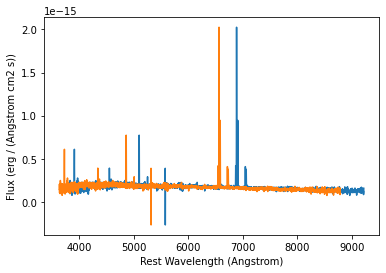

In [ ]:
f, ax = plt.subplots()  

ax.plot(wave, uflux)
ax.plot(wave_rest, uflux)
plt.xlabel('Rest Wavelength ({})'.format(spec.spectral_axis.unit)) 
plt.ylabel('Flux ({})'.format(spec.flux.unit))